In [12]:
import numpy as np
import scipy.io
import matplotlib.pyplot as plt
from scipy.stats import norm, mannwhitneyu, normaltest, ttest_ind

In [4]:
# Load MATLAB data
data = scipy.io.loadmat('Data_example2.mat')
NCP = data['NCP']
Patients = data['Patients']

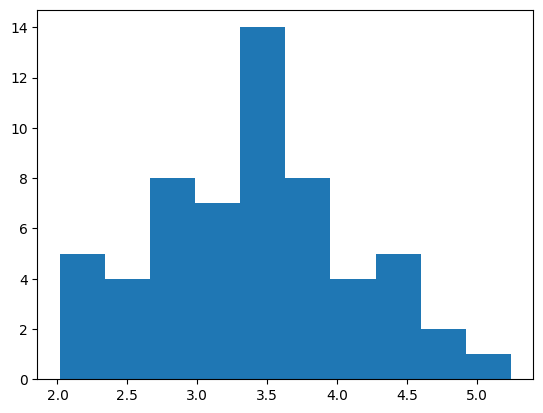

In [5]:
# Visualizzazione preliminare dei dati
plt.figure()
plt.hist(NCP)
plt.show()

In [7]:
# Test di normalità
_,p = normaltest(NCP)
p

array([0.73946736])

In [9]:
# Divido i due gruppi

NCP_pd = data['NCP'][data['Patients'] == 'PD Patient']
NCP_sani = data['NCP'][data['Patients'] == 'Healthy']
mean_pd = np.nanmean(NCP_pd)
mean_sani = np.nanmean(NCP_sani)
dev_pd = np.nanstd(NCP_pd)
dev_sani = np.nanstd(NCP_sani)

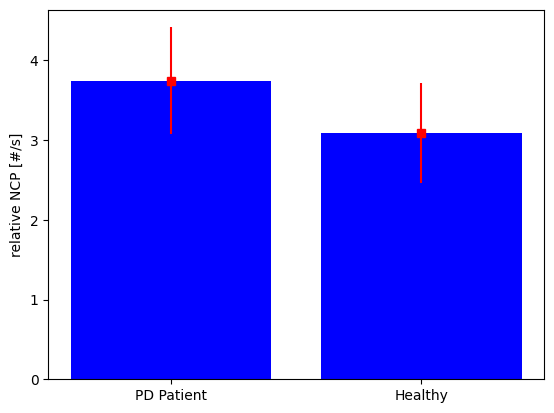

In [11]:
## Visualizzazione dei dati
plt.figure()
plt.bar([1, 2], [mean_pd, mean_sani], color='blue')
plt.errorbar([1, 2], [mean_pd, mean_sani], yerr=[dev_pd, dev_sani], fmt='sr', markerfacecolor='red')
plt.xticks([1, 2], ['PD Patient', 'Healthy'])
plt.ylabel('relative NCP [#/s]')
plt.show()

In [14]:
## Scegliere il test opportuno e formulare H0
_, p1 = ttest_ind(NCP_sani, NCP_pd)
p1

0.0004102393342268427

In [16]:
if p1 < 0.05: 
    print("Reject H0")
else: 
    print("Fail to reject H0")

Reject H0
